In [25]:
'''
Model Comparison and Occam’s Razor
Author: Marisa Tania
'''
from IPython.display import IFrame
IFrame('http://www.usablestats.com/lessons/normal', width=700, height=350)
from scipy.optimize import curve_fit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def yTrue(x, k, phi):
    '''
    This function is the model sin(kx+phi)
    '''
    return np.sin(k * x + phi)

# Given data
err_floor = 0.1
k = 2
phi = np.pi/6
N = 101
x_arr = np.linspace(0, 2 * np.pi, N)
y_true = yTrue(x_arr, k, phi)
meas_err = 0.2 * y_true

# specify error to simulate noisy data
var = meas_err ** 2 + err_floor ** 2
total_err = np.sqrt(var)
y_noise = total_err * np.random.randn(x_arr.shape[0])

# normalization
# y_norm = y_noise / y_noise.sum()

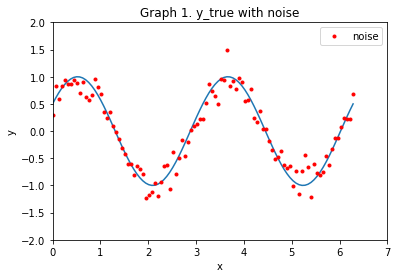

In [27]:
# Generate noise
y_data = yTrue(x_arr, k, phi)
y = y_data + y_noise
# y_n = y_data + y_norm

# Plot noise
#plt.scatter(x_arr, y_data, marker = 'x')
plt.plot(x_arr, y_data)
#plt.plot(x_arr, y_n, 'y.', label = 'normalized noise')
plt.plot(x_arr, y, 'r.', label = 'noise')
plt.legend()
plt.title("Graph 1. y_true with noise")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()

In [28]:
# Determine best fit 
# curve_fit(….., p0=[k_guess, phi_guess])
popt, _ = curve_fit(yTrue, x_arr, y, p0=[k, phi], maxfev=10000)
y_best_fit = yTrue(x_arr, *popt)
chi2 = ((y - y_best_fit) ** 2 / var).sum()
print('The chi^2 is: {:.4f}'.format(chi2))

# the reduced chi2
n = 2 # number of fitting parameters
DOF = N - n
chi2_nu = chi2 / DOF
print('The reduced chi^2 is: {:.4f}'.format(chi2_nu))

The chi^2 is: 100.1423
The reduced chi^2 is: 1.0115


Best-fit for k and phi:
[2.000 0.513]
chi2, chi2_nu, DOF are: 100.142, 1.012, 99.000, respectively.


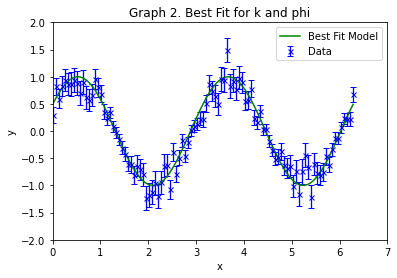

In [29]:
# Display sin result
print('Best-fit for k and phi:')
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print(popt)
print('chi2, chi2_nu, DOF are: {:.3f}, {:.3f}, {:.3f}, respectively.'.format(chi2, chi2_nu, DOF))

# Plot best fit k and phi
plt.errorbar(x_arr, y, yerr=total_err, fmt='xb', ms=5, capsize=3, elinewidth=1.3, label='Data')
plt.plot(x_arr, y_best_fit, 'g-', label='Best Fit Model')
#plt.plot(x_arr, true_val, 'k', label='True Value')

plt.legend()
plt.title('Graph 2. Best Fit for k and phi')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()

In [30]:
def y_model(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    '''
    This function is the model c0 + c1x + c2x2 + c3x3 + c4x4 + c5x5 + c6x6 + c7x7 + c8x8
    '''
    return (c0 + c1 * x + c2 * (x ** 2) + c3 * (x ** 3) + c4 * (x ** 4) + \
            c5 * (x ** 5) + c6 * (x ** 6) + c7 * (x ** 7) + c8 * (x ** 8))

In [31]:
# Determine best fit
popt_poly, _ = curve_fit(y_model, x_arr, y, maxfev=10000)
y_best_poly = popt_poly[0] + popt_poly[1] * x_arr + popt_poly[2] * (x_arr ** 2) + popt_poly[3] * (x_arr ** 3) + \
popt_poly[4] * (x_arr ** 4) + popt_poly[5] *(x_arr ** 5) + popt_poly[6] * (x_arr ** 6) + \
popt_poly[7] * (x_arr **7 ) + popt_poly[8] * (x_arr ** 8)

chi2_poly = ((y - y_best_poly) **2 / var).sum()
print('The polynomial chi^2 is: {:.3f}'.format(chi2_poly))

# reduced chi2
n_poly = 9 # number of fitting parameters
DOF_poly = N - n_poly
chi2_nu_poly = chi2_poly / DOF_poly
print('The reduced polynomial chi^2 is: {:.3f}'.format(chi2_nu_poly))

The polynomial chi^2 is: 101.083
The reduced polynomial chi^2 is: 1.099


Best-fit polynomial coefficients:
[0.644 -0.925 7.463 -12.623 8.227 -2.625 0.440 -0.037 0.001]
chi2, chi2_nu, DOF are: 101.083, 1.099, 92.000, respectively.


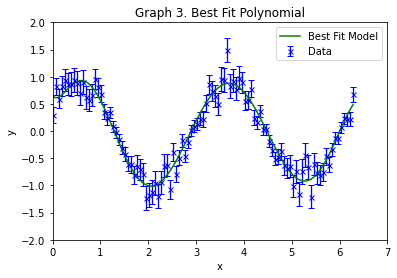

In [32]:
# Display result polynomial
print('Best-fit polynomial coefficients:')
np.set_printoptions(formatter={'float': '{:.3f}'.format})
print(popt_poly)
print('chi2, chi2_nu, DOF are: {:.3f}, {:.3f}, {:.3f}, respectively.'.format(chi2_poly, chi2_nu_poly, DOF_poly))

# Plot best fit polynomial with errorbar
plt.errorbar(x_arr, y, yerr=total_err, fmt='xb', ms=5, capsize=3, elinewidth=1.3, label= 'Data')
plt.plot(x_arr, y_best_poly, 'g', label='Best Fit Model')
plt.title('Graph 3. Best Fit Polynomial')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.show()